In [1]:
import seaborn as sns
import os
import pandas as pd

In [2]:
cd ~/workspace/theislab/retina/notebooks/query_to_reference

/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/retina/notebooks/query_to_reference


In [3]:
print('here...')

here...


In [4]:
df = []
for f in os.listdir('.'):
    if not f.endswith('.tsv.gz'):
        continue
    if not 'group1' in f and not 'scpred_prediction' in f:
        continue
    # output_basename = ('scanvi_query_to_reference_%s_subset_%i_%i_%s.tsv.gz' %
    #                    (dataset_code, use_subset, i, cell_level_key))

    s = f.split('_')
    j = -1 if 'scpred' in f else 0
    dataset_code, size, group = s[4], int(s[-2 + j]), s[-1 + j].replace('.tsv.gz', '')

    df2 = pd.read_csv(f,
                      # nrows=10,
                      index_col=0)
    
    df2['tech'] = dataset_code
    df2['size'] = int(size)
    group = group.replace('.pdf', '')
    df2['group'] = group

    if group != 'scpred' or size < 20000:
        continue 

    if df2.shape[1] < 25:
        continue
    print(dataset_code, size, group)
    print(f)
    print(s)
    print(df2.shape)
    df.append(df2)
    print('')

df = pd.concat(df)

/tmp/ipykernel_8834/3883103627.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f,


sc 265656 scpred
scanvi_query_to_reference_sc_subset_0_265656_scpred_prediction.tsv.gz
['scanvi', 'query', 'to', 'reference', 'sc', 'subset', '0', '265656', 'scpred', 'prediction.tsv.gz']
(175688, 27)



/tmp/ipykernel_8834/3883103627.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f,


sn 1651184 scpred
scanvi_query_to_reference_sn_subset_0_1651184_scpred_prediction.tsv.gz
['scanvi', 'query', 'to', 'reference', 'sn', 'subset', '0', '1651184', 'scpred', 'prediction.tsv.gz']
(175688, 26)



/tmp/ipykernel_8834/3883103627.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f,
/tmp/ipykernel_8834/3883103627.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f,


In [5]:
df.groupby(['group', 'tech', 'size']).size()

group   tech  size   
scpred  sc    265656     175688
        sn    1651184    175688
dtype: int64

In [6]:
df

,cell_type,batch,cell_type_preannotation,leiden,cell_type_scarches_pred,cell_type_scarches_uncertainty,cell_type_scarches_uncertainty_norm,DF.classifications,nCount_RNA,nFeature_RNA,...,disease,region,tech,accession,dataset,sampleid,n_counts,high_uncertainty,size,group
0,Unknown,AMD,Rod,0,Rod:Rod,0.000000e+00,0.000000e+00,Singlet,5229.0,2386,...,IntermediateAMD(AREDS3),Macular,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,5229.0,False,265656,scpred
1,Unknown,AMD,Rod,0,Rod:Rod,5.960464e-08,7.450764e-08,Singlet,4704.0,2241,...,IntermediateAMD(AREDS3),Macular,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,4704.0,False,265656,scpred
2,Unknown,AMD,Rod,0,Rod:Rod,5.960464e-08,7.450764e-08,Singlet,5910.0,2497,...,IntermediateAMD(AREDS3),Macular,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,5910.0,False,265656,scpred
3,Unknown,AMD,Rod,0,Rod:Rod,0.000000e+00,0.000000e+00,Singlet,7584.0,3177,...,IntermediateAMD(AREDS3),Macular,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,7584.0,False,265656,scpred
4,Unknown,AMD,BC,10,BC:BC,5.960464e-08,7.450764e-08,Singlet,4072.0,1914,...,IntermediateAMD(AREDS3),Macular,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,4072.0,False,265656,scpred
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175683,Unknown,AMD,NaN,8,MG:MG,0.000000e+00,0.000000e+00,Singlet,10821.0,4228,...,EarlyAMD,Periphery,sn,GSE188280,Stambolian,Stambolian_GSM5676884,10821.0,NaN,1651184,scpred
175684,Unknown,AMD,NaN,6,BC:BC,0.000000e+00,0.000000e+00,Singlet,10367.0,4048,...,EarlyAMD,Periphery,sn,GSE188280,Stambolian,Stambolian_GSM5676884,10367.0,NaN,1651184,scpred
175685,Unknown,AMD,NaN,8,MG:MG,0.000000e+00,0.000000e+00,Singlet,11977.0,4384,...,EarlyAMD,Periphery,sn,GSE188280,Stambolian,Stambolian_GSM5676884,11977.0,NaN,1651184,scpred
175686,Unknown,AMD,NaN,7,BC:BC,0.000000e+00,0.000000e+00,Singlet,13361.0,4692,...,EarlyAMD,Periphery,sn,GSE188280,Stambolian,Stambolian_GSM5676884,13361.0,NaN,1651184,scpred


In [7]:
df.shape

(351376, 27)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [9]:
df['size'].value_counts()

265656     175688
1651184    175688
Name: size, dtype: int64

In [10]:
k = 'scpred'

df2 = df[(df['group'] == k) & (df['size'] != 9251)]
print(df2['cell_type_scarches_pred'].value_counts())
print(df2.shape)

Rod:Rod                131353
BC:BC                   94581
MG:MG                   72399
RGC:RGC                 12518
Cone:Cone               10738
AC:AC                    9367
Microglia:Microglia      7997
HC:HC                    6803
Astrocyte:Astrocyte      3808
RPE:RPE                  1812
Name: cell_type_scarches_pred, dtype: int64
(351376, 27)


In [11]:
import numpy as np


In [12]:
import matplotlib.pyplot as plt

(array([2.45023e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 9.04530e+04, 1.84000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 7.08100e+03, 8.63500e+03]),
 array([-3.45387764e+01, -3.31572253e+01, -3.17756743e+01, -3.03941232e+01,
        -2.90125722e+01, -2.76310211e+01, -2.62494701e+01, -2.48679190e+01,
        -2.34863679e+01, -2.21048169e+01, -2.07232658e+01, -1.93417148e+01,
        -1.79601637e+01, -1.65786127e+01, -1.51970616e+01, -1.38155106e+01,
        -1.24339595e+01, -1.10524084e+01, -9.67085739e+00, -8.28930633e+00,
        -6.90775528e+00, -5.52620422e+00, -4.14465317e+00, -2.76310211e+00,
        -1.38155106e+00,  1.11022302e-15]),
 <BarContainer object of 25 artists>)

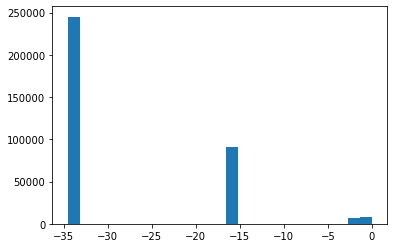

In [13]:
ylab = 'cell_type_scarches_uncertainty_norm'
y = df2[ylab]
df2['uncertaninty_log'] = np.log(y + 1e-15)

plt.hist(df2['uncertaninty_log'], bins=25)

In [14]:
df2.groupby(['size', 'tech']).size()

size     tech
265656   sc      175688
1651184  sn      175688
dtype: int64

In [15]:
df2['high_uncertainty'] = df2['cell_type_scarches_uncertainty_norm'] > 0.166727
df2.groupby(['cell_type_scarches_pred', 'high_uncertainty']).size()
df2.to_csv("labels_uncertainty_by_cell_type.csv.gz")
# target_adata.obs['cell_type_scarches_pred'] = matched_pred['cell_type_scarches_pred'].values
# target_adata.obs['high_uncertainty'] = sel.values

# sub = target_adata[target_adata.obs['cell_type_scarches_pred'].isin({'Microglia:Microglia', 'RPE:RPE', 'Astrocyte:Astrocyte'}),:]

# sub.obs.groupby(['cell_type_scarches_pred', 'high_uncertainty']).size()

In [16]:
for tech in ['sn', 'sc']:
    df4 = df2[(df2['tech'] == tech)]
    print(tech, df4['cell_type_scarches_pred'].value_counts().to_dict())

sn {'Rod:Rod': 67587, 'BC:BC': 46865, 'MG:MG': 35708, 'RGC:RGC': 6605, 'Cone:Cone': 5110, 'AC:AC': 4556, 'Microglia:Microglia': 3991, 'HC:HC': 3188, 'Astrocyte:Astrocyte': 1936, 'RPE:RPE': 142}
sc {'Rod:Rod': 63766, 'BC:BC': 47716, 'MG:MG': 36691, 'RGC:RGC': 5913, 'Cone:Cone': 5628, 'AC:AC': 4811, 'Microglia:Microglia': 4006, 'HC:HC': 3615, 'Astrocyte:Astrocyte': 1872, 'RPE:RPE': 1670}


In [17]:
df3 = df2[(df2['tech'] == 'sn') & (df2['size'] == 1651184)] # .groupby('cell_type_scarches_pred').size()
counts_per_celltype = df3['cell_type_scarches_pred'].value_counts().to_dict()

df2['k2'] = df2['cell_type_scarches_pred'] + ' (' + df2['cell_type_scarches_pred'].map(counts_per_celltype).astype(str) + ')'
df2['k2'] = df2['k2'].str.split(':').str[1]
df2['k2'].value_counts()

# print('')
uncert_labels = df2.groupby('k2').mean().sort_values('cell_type_scarches_uncertainty', ascending=False).index

uncert_labels = list(uncert_labels[1:]) + list(uncert_labels[:1])

In [18]:
df2

,cell_type,batch,cell_type_preannotation,leiden,cell_type_scarches_pred,cell_type_scarches_uncertainty,cell_type_scarches_uncertainty_norm,DF.classifications,nCount_RNA,nFeature_RNA,...,tech,accession,dataset,sampleid,n_counts,high_uncertainty,size,group,uncertaninty_log,k2
0,Unknown,AMD,Rod,0,Rod:Rod,0.000000e+00,0.000000e+00,Singlet,5229.0,2386,...,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,5229.0,False,265656,scpred,-34.538776,Rod (67587)
1,Unknown,AMD,Rod,0,Rod:Rod,5.960464e-08,7.450764e-08,Singlet,4704.0,2241,...,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,4704.0,False,265656,scpred,-16.412364,Rod (67587)
2,Unknown,AMD,Rod,0,Rod:Rod,5.960464e-08,7.450764e-08,Singlet,5910.0,2497,...,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,5910.0,False,265656,scpred,-16.412364,Rod (67587)
3,Unknown,AMD,Rod,0,Rod:Rod,0.000000e+00,0.000000e+00,Singlet,7584.0,3177,...,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,7584.0,False,265656,scpred,-34.538776,Rod (67587)
4,Unknown,AMD,BC,10,BC:BC,5.960464e-08,7.450764e-08,Singlet,4072.0,1914,...,sc,private,Chen_AMD,Chen_AMD_10x3_19_D18_Macular,4072.0,False,265656,scpred,-16.412364,BC (46865)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175683,Unknown,AMD,NaN,8,MG:MG,0.000000e+00,0.000000e+00,Singlet,10821.0,4228,...,sn,GSE188280,Stambolian,Stambolian_GSM5676884,10821.0,False,1651184,scpred,-34.538776,MG (35708)
175684,Unknown,AMD,NaN,6,BC:BC,0.000000e+00,0.000000e+00,Singlet,10367.0,4048,...,sn,GSE188280,Stambolian,Stambolian_GSM5676884,10367.0,False,1651184,scpred,-34.538776,BC (46865)
175685,Unknown,AMD,NaN,8,MG:MG,0.000000e+00,0.000000e+00,Singlet,11977.0,4384,...,sn,GSE188280,Stambolian,Stambolian_GSM5676884,11977.0,False,1651184,scpred,-34.538776,MG (35708)
175686,Unknown,AMD,NaN,7,BC:BC,0.000000e+00,0.000000e+00,Singlet,13361.0,4692,...,sn,GSE188280,Stambolian,Stambolian_GSM5676884,13361.0,False,1651184,scpred,-34.538776,BC (46865)


In [19]:
uncert_labels

['Astrocyte (1936)',
 'Microglia (3991)',
 'AC (4556)',
 'HC (3188)',
 'Cone (5110)',
 'MG (35708)',
 'RGC (6605)',
 'Rod (67587)',
 'BC (46865)',
 'RPE (142)']

In [20]:
df3.groupby('cell_type_scarches_pred')['cell_type_scarches_uncertainty_norm'].describe(percentiles=[.85])

,count,mean,std,min,50%,85%,max
cell_type_scarches_pred,,,,,,,
AC:AC,4556.0,0.050327,0.143591,0.0,0.0,1.426904e-01,0.999602
Astrocyte:Astrocyte,1936.0,0.066577,0.166473,0.0,0.0,1.427655e-01,0.856732
BC:BC,46865.0,0.003211,0.038568,0.0,0.0,8.511142e-08,0.857102
Cone:Cone,5110.0,0.010926,0.069978,0.0,0.0,8.511142e-08,0.857030
HC:HC,3188.0,0.010211,0.072140,0.0,0.0,8.511142e-08,0.999350
MG:MG,35708.0,0.010886,0.067576,0.0,0.0,8.511142e-08,0.999567
Microglia:Microglia,3991.0,0.052327,0.160355,0.0,0.0,1.702228e-07,0.999632
RGC:RGC,6605.0,0.017232,0.089443,0.0,0.0,8.511142e-08,0.999403
RPE:RPE,142.0,0.095532,0.258867,0.0,0.0,1.702228e-07,0.999549


In [21]:
thr = df3['cell_type_scarches_uncertainty_norm'].describe(percentiles=[0.975])
thr_plot = thr.values[-2]
print(thr)
print(thr_plot)

count    175688.000000
mean          0.012318
std           0.073880
min           0.000000
50%           0.000000
97.5%         0.142823
max           1.000000
Name: cell_type_scarches_uncertainty_norm, dtype: float64
0.1428230861314775


In [22]:
print('here...')

here...


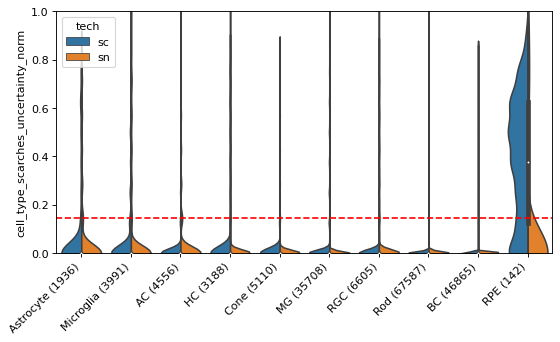

In [23]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 4
rcParams['figure.dpi'] = 80
rcParams['pdf.fonttype'] = 42

sns.violinplot(data=df2,
               x='k2',
               # y='uncertaninty_log',
               y='cell_type_scarches_uncertainty_norm',
               hue='tech', split='true',
               order=uncert_labels,
               width=.8, linewidth=1.4,
               scale='width', cut=1.0)

plt.xticks(rotation=45, ha='right')

plt.ylim([0, 1])
plt.xlabel('')
# plt.show()
# i = df.shape[0]
# plt.tight_layout()
plt.axhline(y=thr_plot, ls='--', color='red')
plt.savefig('violin_plot_scarches_%s.pdf' % (k))

plt.show()

plt.close()
# plt.show()

# df.to_csv('%s.tsv.gz' % (output_basename))

In [24]:
# df3['cell_type_scarches_uncertainty_norm'].describe(percentiles=[0.976])
df2['is_high_uncert'] = df2['cell_type_scarches_uncertainty_norm'] > thr_plot

In [25]:
counts = df2.groupby(['cell_type_scarches_pred', 'is_high_uncert']).size().reset_index().pivot('cell_type_scarches_pred', 'is_high_uncert', 0)
counts = counts.T
for c in counts:
    counts[c] = counts[c] / sum(counts[c])
counts = counts.T * 100
counts

is_high_uncert,False,True
cell_type_scarches_pred,,
AC:AC,92.889933,7.110067
Astrocyte:Astrocyte,86.239496,13.760504
BC:BC,99.485097,0.514903
Cone:Cone,95.474018,4.525982
HC:HC,95.266794,4.733206
MG:MG,95.983370,4.016630
Microglia:Microglia,87.670376,12.329624
RGC:RGC,96.812590,3.187410
RPE:RPE,33.057395,66.942605


### Comparison versus DISEASES target genes

In [26]:
# loading from plot notebook with final values
# labs_uncertainty = pd.read_csv("labels_uncertainty_by_cell_type.csv.gz", index_col=0)
df2.groupby(['tech', 'size']).size()

tech  size   
sc    265656     175688
sn    1651184    175688
dtype: int64

In [27]:
df2.groupby(['tech', 'high_uncertainty']).size()

tech  high_uncertainty
sc    False               169179
      True                  6509
sn    False               171869
      True                  3819
dtype: int64

In [28]:
hm = df2.groupby(['tech', 'cell_type_scarches_pred', 'high_uncertainty']).size().reset_index()
hm['k'] = hm['cell_type_scarches_pred'] + '_' + hm['tech']
hm.pivot('k', 'high_uncertainty', 0)

high_uncertainty,False,True
k,,
AC:AC_sc,4581,230
AC:AC_sn,4168,388
Astrocyte:Astrocyte_sc,1591,281
Astrocyte:Astrocyte_sn,1708,228
BC:BC_sc,47534,182
BC:BC_sn,46602,263
Cone:Cone_sc,5248,380
Cone:Cone_sn,5012,98
HC:HC_sc,3354,261


In [29]:
# sns.boxenplot(data=labs_uncertainty, x='cell_type_scarches_pred', y='cell_type_scarches_uncertainty_norm')
# plt.xticks(rotation=45, ha='right')
# labs_uncertainty.groupby('cell_type_scarches_pred')['cell_type_scarches_uncertainty_norm'].describe(percentiles=[.85])

In [ ]:
matched_pred = df2.copy()

labs = {'Astrocyte:Astrocyte', 'Microglia:Microglia', 'MG:MG', 'AC:AC', 'RPE:RPE'}

matched_pred['high_uncertainty'] = matched_pred['cell_type_scarches_uncertainty_norm'] > thr_plot
# target_adata.obs['cell_type_scarches_pred'] = matched_pred['cell_type_scarches_pred'].values
# target_adata.obs['high_uncertainty'] = sel.values

matched_pred.groupby(['cell_type_scarches_pred', 'high_uncertainty']).size()

cell_type_scarches_pred  high_uncertainty
AC:AC                    False                 8701
                         True                   666
Astrocyte:Astrocyte      False                 3284
                         True                   524
BC:BC                    False                94094
                         True                   487
Cone:Cone                False                10252
                         True                   486
HC:HC                    False                 6481
                         True                   322
MG:MG                    False                69491
                         True                  2908
Microglia:Microglia      False                 7011
                         True                   986
RGC:RGC                  False                12119
                         True                   399
RPE:RPE                  False                  599
                         True                  1213
Rod:Rod               

In [ ]:
matched_pred.shape

(351376, 30)

In [ ]:
matched_pred['k2'] = matched_pred['cell_type_scarches_pred'].astype(str) + '_' + matched_pred['high_uncertainty'].astype(str)
matched_pred['high_uncertainty'] = matched_pred['high_uncertainty'].astype('category')

In [33]:
# load retina data
path_to_AMD = '/mnt/f/workspace/theislab/retina/data/AMD/AMD'
import scanpy as sc
import os
target_adata = sc.read_h5ad(os.path.join(path_to_AMD, 'HumanRetinaAtlas_AMD.h5ad'))
target_adata_annotations_two_samples = sc.read_h5ad(os.path.join(path_to_AMD, 'AMD_RNA_0.9.h5ad'))

target_adata_annotations_two_samples.obs['majorclass'].value_counts()
# target_adata.obs[target_adata.obs_names.str.contains('AMD1')]['sampleid']

print(target_adata.obs['donor'].value_counts())

Chen_19_D018         22515
Stambolian_0715      18334
Stambolian_0106      16998
Stambolian_0716      15263
Stambolian_0902      12956
Stambolian_0124      12893
Stambolian_0524      12747
Stambolian_0727      11983
DiStasio_A18-1974     8675
DiStasio_A20-1232     8455
DiStasio_A20-1257     7458
DiStasio_A19-2617     6222
DiStasio_A19-2161     5458
DiStasio_A1547        5358
DiStasio_G1850        4945
DiStasio_A1098        3738
DiStasio_A0233        1690
Name: donor, dtype: int64


In [34]:
# keep raw counts in another layer, and conduct a simple cell annotation + normalization
target_adata.layers['counts'] = target_adata.X
sc.pp.normalize_per_cell(target_adata)
sc.pp.log1p(target_adata)

target_adata = target_adata[:,target_adata.X.sum(axis=0) != 0].copy()
target_adata.shape
np.any(target_adata.X.sum(axis=0) == 0), np.any(target_adata.X.sum(axis=1) == 0)

(False, False)

In [35]:
print('done loading ref AMD data')

done loading ref AMD data


In [59]:
df = []

for tech in ['sn', 'sc']:
    sub = matched_pred[matched_pred['tech'] == tech]
    print(tech, sub.shape)
    
    assert target_adata.shape[0] == sub['k2'].shape[0]

    target_adata.obs['k2'] = sub['k2'].values
    for g in ['Astrocyte', 'Microglia','MG', 'AC', 'RPE']:
        print(g)
        sub2 = target_adata[target_adata.obs['k2'].str.contains(g),:]
        print(g, sub2.shape)
        # 
        print(sub2.obs['k2'].value_counts())

        sc.tl.rank_genes_groups(sub2, 'k2')
        for k in set(sub2.obs['k2']):
            print(k)
            df2 = sc.get.rank_genes_groups_df(sub2, k)
            df2['k'] = k
            df2['tech'] = tech
            # print(k, df2.shape)
            df.append(df2)
        print('')
df = pd.concat(df)

text_diseases = pd.read_csv('human_disease_textmining_filtered.tsv', sep='\t', header=None)
exp_diseases = pd.read_csv('human_disease_experiments_filtered.tsv', sep='\t', header=None)
disease_id = 'DOID:10871'
amd_genes = set(text_diseases[text_diseases[2] == disease_id][1]).union(set(exp_diseases[exp_diseases[2] == disease_id][1].values))

sn (175688, 30)
Astrocyte
Astrocyte (1936, 34999)
Astrocyte:Astrocyte_False    1693
Astrocyte:Astrocyte_True      243
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Astrocyte:Astrocyte_True
Astrocyte:Astrocyte_False

Microglia
Microglia (3991, 34999)
Microglia:Microglia_False    3617
Microglia:Microglia_True      374
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Microglia:Microglia_True
Microglia:Microglia_False

MG
MG (35708, 34999)
MG:MG_False    34918
MG:MG_True       790
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


MG:MG_False
MG:MG_True

AC
AC (4556, 34999)
AC:AC_False    4120
AC:AC_True      436
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


AC:AC_True
AC:AC_False

RPE
RPE (142, 34999)
RPE:RPE_False    123
RPE:RPE_True      19
Name: k2, dtype: int64
RPE:RPE_True


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


RPE:RPE_False

sc (175688, 30)
Astrocyte
Astrocyte (1872, 34999)
Astrocyte:Astrocyte_False    1591
Astrocyte:Astrocyte_True      281
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Astrocyte:Astrocyte_True
Astrocyte:Astrocyte_False

Microglia
Microglia (4006, 34999)
Microglia:Microglia_False    3394
Microglia:Microglia_True      612
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Microglia:Microglia_True
Microglia:Microglia_False

MG
MG (36691, 34999)
MG:MG_False    34573
MG:MG_True      2118
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


MG:MG_False
MG:MG_True

AC
AC (4811, 34999)
AC:AC_False    4581
AC:AC_True      230
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


AC:AC_True
AC:AC_False

RPE
RPE (1670, 34999)
RPE:RPE_True     1194
RPE:RPE_False     476
Name: k2, dtype: int64


/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


RPE:RPE_True
RPE:RPE_False



In [60]:
df['is_amd'] = df.names.isin(amd_genes)
df.is_amd.value_counts()

False    694700
True       5280
Name: is_amd, dtype: int64

In [61]:
df.shape

(699980, 8)

In [62]:
pd.options.display.max_rows = None
sel_names = df.groupby(['tech', 'k']).head(11)['names'].drop_duplicates()
print(len(sel_names))

157


In [63]:
df.head()

,names,scores,logfoldchanges,pvals,pvals_adj,k,tech,is_amd
0,MT-ATP6,18.658159,2.102554,1.983413e-59,9.641316e-57,Astrocyte:Astrocyte_True,sn,False
1,MT-CO1,16.961374,1.956007,5.921120e-51,1.936760e-48,Astrocyte:Astrocyte_True,sn,False
2,MT-CO2,16.107166,1.831257,6.995513e-46,1.840872e-43,Astrocyte:Astrocyte_True,sn,False
3,EEF1A1,15.873479,1.600016,3.318035e-44,7.953967e-42,Astrocyte:Astrocyte_True,sn,False
4,MT-CO3,15.574986,1.911898,6.442430e-44,1.520775e-41,Astrocyte:Astrocyte_True,sn,False


In [64]:
# matched_pred[matched_pred['cell_type_scarches_pred'] == 'RPE:RPE']

In [65]:
len(amd_genes)

279

In [66]:
uncert_genes = df.groupby('k').head(5).drop_duplicates("names") # ['is_amd'] # .sum()amd_hits

In [67]:
sum(uncert_genes['names'].isin(amd_genes)), len(uncert_genes['names'])

(3, 45)

Calculate a moving enrichment based on number of AMD hits found in a given threshold

In [115]:
from scipy.stats import fisher_exact
amd_genes_in_adata = set(amd_genes).intersection(target_adata.var_names)
len(amd_genes), len(amd_genes_in_adata)

res = []
for n_genes in range(30):
    uncert_genes = df.groupby(['tech', 'k']).head(n_genes).drop_duplicates("names") # ['is_amd'] # .sum()amd_hits
    # print(n_genes, uncert_genes.shape[0], uncert_genes[uncert_genes.is_amd].shape[0])

    sel_genes = set(uncert_genes['names'])
    amd_genes_subset = amd_genes_in_adata.intersection(sel_genes)
    # print(len(amd_genes_in_adata), target_adata.var_names.shape[0], len(amd_genes_subset), len(sel_genes))

    odds_ratio, pval = fisher_exact([[len(amd_genes_subset), len(sel_genes)],
                                     [len(amd_genes_in_adata), target_adata.var_names.shape[0]]],
                                     alternative='greater')
    
    res.append([n_genes, len(amd_genes_subset), len(sel_genes), odds_ratio, pval])
    print(res[-1])
res = pd.DataFrame(res, columns=['n_select', 'n_hits', 'n_genes', 'odds_ratio', 'p_value']).fillna(0)
    

[0, 0, 0, nan, 1.0]
[1, 1, 17, 7.798351158645277, 0.1269333582578166]
[2, 3, 35, 11.363311688311688, 0.0029680434959361342]
[3, 3, 50, 7.954318181818182, 0.0075761153024019815]
[4, 3, 62, 6.4147727272727275, 0.013210966300622025]
[5, 4, 78, 6.798562548562549, 0.0035574942543140707]
[6, 4, 92, 5.763998682476943, 0.006215015308437101]
[7, 4, 106, 5.002715837621498, 0.009938764144045794]
[8, 5, 118, 5.617456343091936, 0.0025498990576900554]
[9, 7, 132, 7.030331726354453, 0.00010296085641745954]
[10, 8, 144, 7.365109427609427, 2.4669603419586542e-05]
[11, 8, 157, 6.755259602393361, 4.420927555929868e-05]
[12, 8, 169, 6.275596198673122, 7.232626463826157e-05]
[13, 8, 184, 5.763998682476943, 0.00012688646843086448]
[14, 8, 198, 5.3564432200795835, 0.0002048096071343985]
[15, 8, 212, 5.002715837621498, 0.00031820664911259985]
[16, 8, 226, 4.692813086618396, 0.0004781697462249731]
[17, 8, 240, 4.419065656565657, 0.0006977322574112113]
[18, 9, 253, 4.71599892202659, 0.0002113039580867106]
[19, 

Text(0.5, 1.0, 'enrichment of AMD-associated genes')

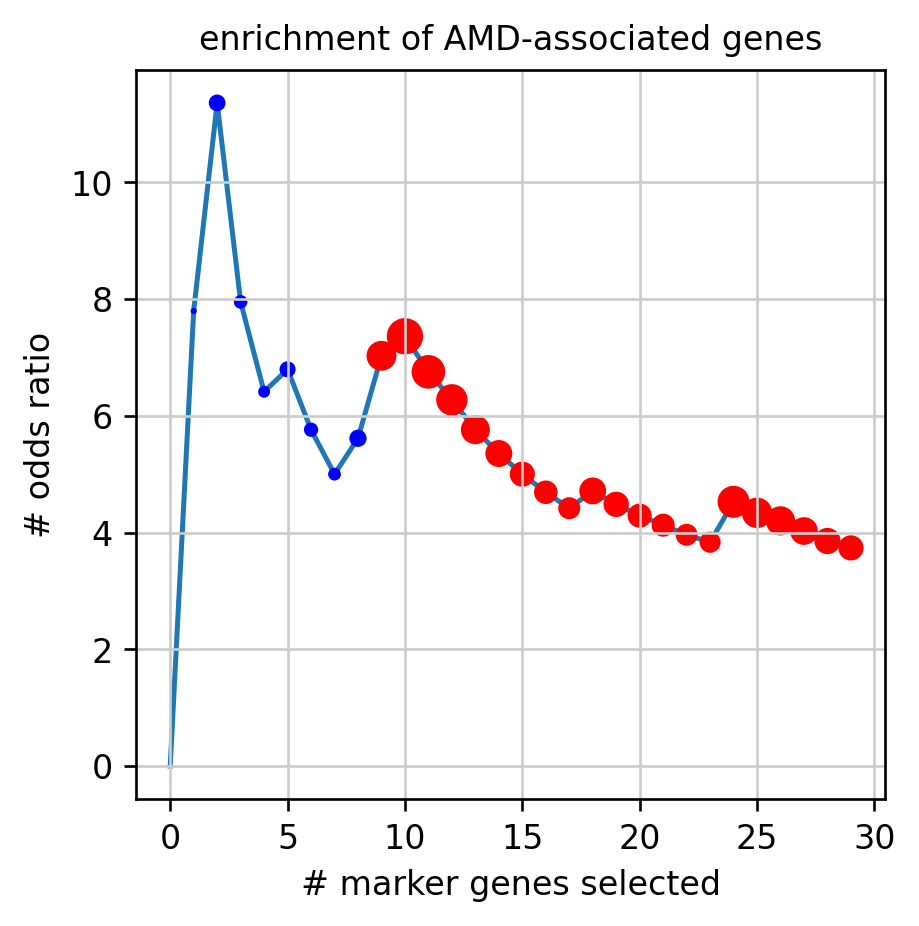

In [69]:
plt.scatter(x=res['n_select'],
            y=res['odds_ratio'],
            s=-np.log10(res['p_value']) ** 3,
            c=np.where(res['p_value'] < 0.001, 'red', 'blue'),
            zorder=1)
plt.plot(res['n_select'], res['odds_ratio'], zorder=0)
plt.xlabel('# marker genes selected')
plt.ylabel('# odds ratio')
plt.title('enrichment of AMD-associated genes')

In [101]:
uncert_genes = df.groupby(['tech', 'k']).head(1).drop_duplicates("names") # ['is_amd'] # .sum()amd_hits
# uncert_genes

uncert_genes_amd = df.groupby(['tech', 'k']).head(10).drop_duplicates("names")
uncert_genes_amd = uncert_genes_amd[uncert_genes_amd['is_amd']]

uncert_genes = pd.concat([uncert_genes, uncert_genes_amd]).sort_values('k', ascending=False).drop_duplicates("names")

In [102]:
uncert_genes['k'].drop_duplicates()

1                 RPE:RPE_True
9                RPE:RPE_False
0     Microglia:Microglia_True
0    Microglia:Microglia_False
0                   MG:MG_True
1                  MG:MG_False
0     Astrocyte:Astrocyte_True
0    Astrocyte:Astrocyte_False
0                   AC:AC_True
0                  AC:AC_False
Name: k, dtype: object

In [103]:
# uncert_genes = uncert_genes.sort_values('k')

In [104]:
uncert_genes[uncert_genes['is_amd']]

,names,scores,logfoldchanges,pvals,pvals_adj,k,tech,is_amd
1,ACTG1,14.089178,1.588903,1.316221e-40,1.535548e-36,RPE:RPE_True,sc,True
9,COL8A1,13.496386,6.425590,2.076202e-35,3.852870e-32,RPE:RPE_False,sc,True
8,RDH5,19.668045,31.465059,1.211178e-39,7.065004e-36,RPE:RPE_False,sn,True
7,TRPM3,20.294497,6.912809,3.498763e-16,9.796256e-14,RPE:RPE_False,sn,True
0,CLU,18.025270,3.061171,6.084397e-54,1.080953e-51,Microglia:Microglia_True,sn,True
4,EYS,23.231050,3.160038,1.297186e-91,2.193248e-89,MG:MG_True,sn,True
1,CDH23,37.732796,2.767138,9.776583e-185,2.632082e-181,MG:MG_False,sn,True
8,PDE6A,8.733241,2.665954,4.656219e-16,3.645705e-14,AC:AC_True,sc,True


In [105]:
pd.options.display.max_rows = 50
# sub.obs

In [106]:
categories_order = ['%s:%s_%s' % (k1, k1, k2) for k1 in ['RPE', 'Astrocyte', 'Microglia','MG', 'AC'] for k2 in ['False', 'True']]# [:-1]
# categories_order = ['%s:%s_%s' % (k1, k1, k2) for k1 in ['Microglia','MG', 'AC'] for k2 in ['True', 'False']]
categories_order

['RPE:RPE_False',
 'RPE:RPE_True',
 'Astrocyte:Astrocyte_False',
 'Astrocyte:Astrocyte_True',
 'Microglia:Microglia_False',
 'Microglia:Microglia_True',
 'MG:MG_False',
 'MG:MG_True',
 'AC:AC_False',
 'AC:AC_True']

In [107]:
uncert_genes[uncert_genes['is_amd']]['names'].values

array(['ACTG1', 'COL8A1', 'RDH5', 'TRPM3', 'CLU', 'EYS', 'CDH23', 'PDE6A'],
      dtype=object)

In [108]:
cd ~/workspace/theislab/retina/notebooks/query_to_reference

/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/retina/notebooks/query_to_reference


In [109]:
target_adata.obs['k2']

AMD1_AAACCCAAGAATCCCT-1          Rod:Rod_False
AMD1_AAACCCAAGTTCCATG-1          Rod:Rod_False
AMD1_AAACCCACAACTCCAA-1          Rod:Rod_False
AMD1_AAACCCACACAACCGC-1          Rod:Rod_False
AMD1_AAACCCACAGGGCTTC-1            BC:BC_False
                                     ...      
GSM5676884_TTTGGTTGTCAGATTC-1      MG:MG_False
GSM5676884_TTTGGTTTCAACCGAT-1      BC:BC_False
GSM5676884_TTTGGTTTCGGTGTAT-1      MG:MG_False
GSM5676884_TTTGTTGCAGTGCCTG-1      BC:BC_False
GSM5676884_TTTGTTGGTCGTACAT-1      MG:MG_False
Name: k2, Length: 175688, dtype: object

In [110]:
target_adata.obs['k2'].value_counts()

Rod:Rod_False                62701
BC:BC_False                  47534
MG:MG_False                  34573
RGC:RGC_False                 5727
Cone:Cone_False               5248
AC:AC_False                   4581
Microglia:Microglia_False     3394
HC:HC_False                   3354
MG:MG_True                    2118
Astrocyte:Astrocyte_False     1591
RPE:RPE_True                  1194
Rod:Rod_True                  1065
Microglia:Microglia_True       612
RPE:RPE_False                  476
Cone:Cone_True                 380
Astrocyte:Astrocyte_True       281
HC:HC_True                     261
AC:AC_True                     230
RGC:RGC_True                   186
BC:BC_True                     182
Name: k2, dtype: int64

/home/rio/miniconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


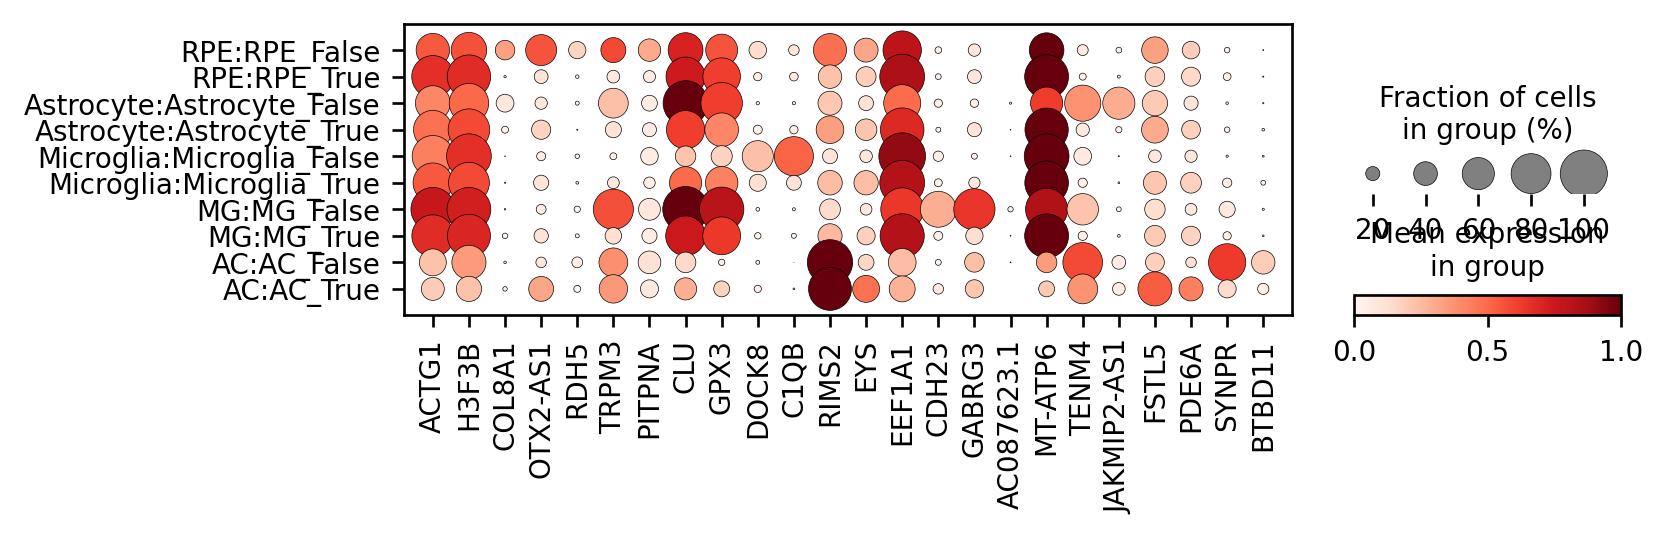

In [114]:
sc.set_figure_params(scanpy=True, fontsize=10)
rcParams['figure.dpi'] = 120
rcParams['pdf.fonttype'] = 42
fig = sc.pl.dotplot(target_adata[target_adata.obs['k2'].isin(categories_order),:],
                    uncert_genes['names'],
                    groupby='k2',
                    cmap='Reds',
                    categories_order=categories_order,
                    var_group_labels=uncert_genes[uncert_genes['is_amd']]['names'].values,
                    # dendrogram=True,
                    # n_genes=11,
                    figsize=[6.5, 1.6],
                    standard_scale='group',
                    dot_min=0, dot_max=1,
                    # var_group_positions=[6, 8],
                    return_fig =True)
fig.get_axes()['mainplot_ax']

plt.savefig('dotplot_selected_scarches.pdf')

### Study per patient

In [112]:
col_colors = df[['disease', 'region', 'sampleid']].value_counts().reset_index().set_index('sampleid')
del col_colors[0]


KeyError: "None of [Index(['disease', 'region', 'sampleid'], dtype='object')] are in the [columns]"

In [ ]:
col_colors.sort_values('sampleid')

,disease,region
sampleid,,
Chen_AMD_10x3_19_D18_Macular,IntermediateAMD(AREDS3),Macular
DiStasio_GSM6841149,WetAMD,Unknown
DiStasio_GSM6841150,WetAMD,Unknown
DiStasio_GSM6841152,WetAMD,Unknown
DiStasio_GSM6841153,WetAMD,Unknown
DiStasio_GSM6841154,WetAMD,Unknown
DiStasio_GSM6841155,WetAMD,Unknown
DiStasio_GSM6841156,DryAMD,Unknown
DiStasio_GSM6841157,DryAMD,Unknown


In [ ]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [ ]:

cmap_disease = dict(zip(set(col_colors['disease']), sns.color_palette('Set1')))
cmap_region = dict(zip(set(col_colors['region']), sns.color_palette('Set1')))

col_colors['disease'] = col_colors['disease'].map(cmap_disease)
col_colors['region'] = col_colors['region'].map(cmap_region)

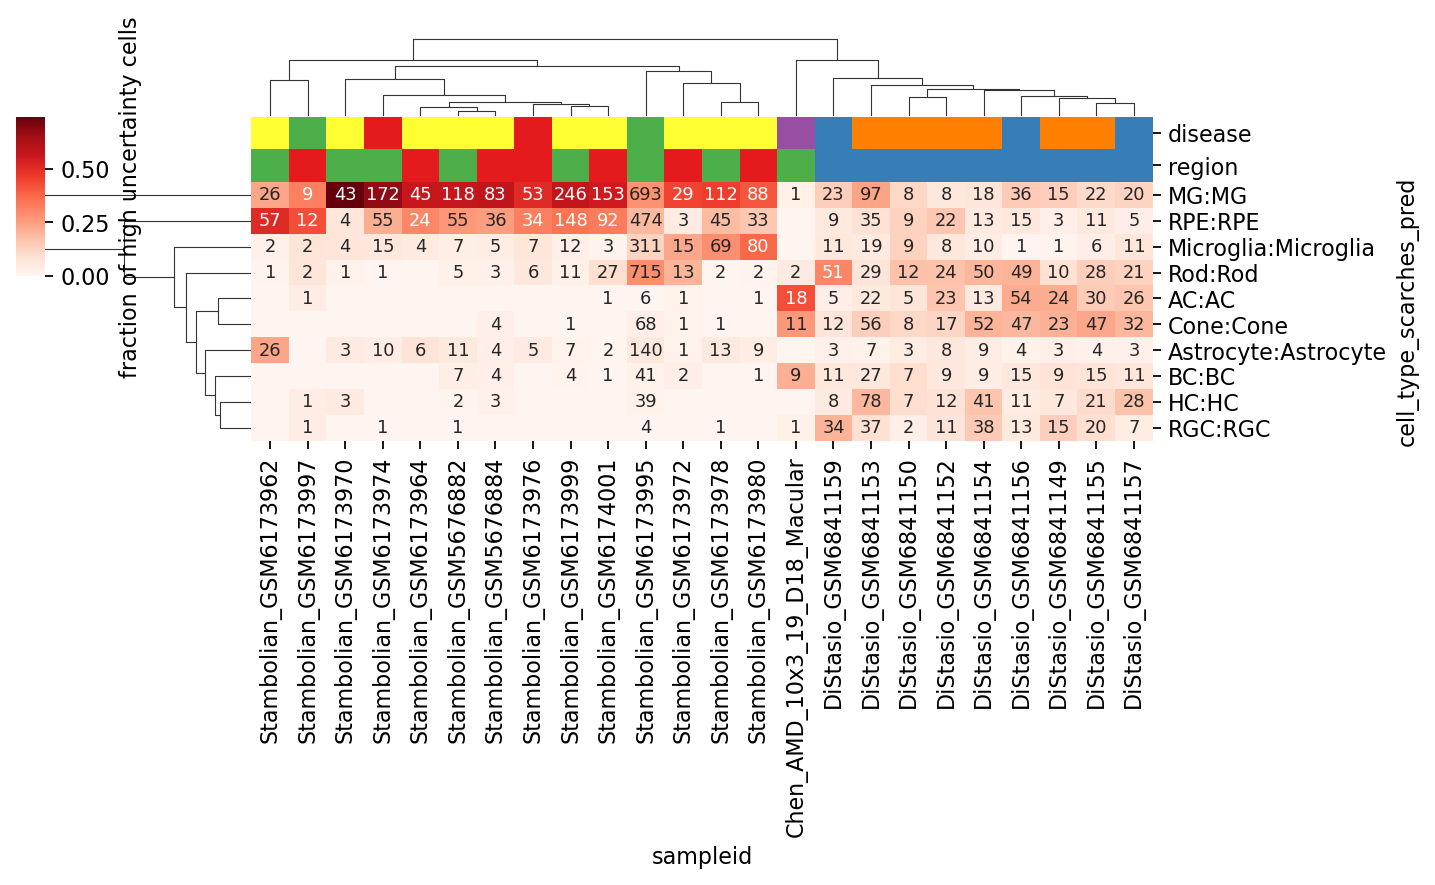

In [ ]:
hm = df.groupby(['sampleid', 'cell_type_scarches_pred', 'high_uncertainty']).size().reset_index()
hm = hm[hm['high_uncertainty']]
counts = hm.pivot('sampleid', 'cell_type_scarches_pred', 0).fillna(0).T
pct = counts.copy()
for c in pct:
    pct[c] = pct[c] / sum(pct[c])
sns.clustermap(pct,
               annot=np.where(counts != 0, counts.astype(int), ''),
               fmt='',
               annot_kws={'fontsize': 8},
               cbar_kws={'label': 'fraction of high uncertainty cells'},
               figsize=[9, 5.5],
               colors_ratio=0.08,
               cbar_pos=(0.01, 0.7, 0.02, 0.18),
               col_colors=col_colors[['disease', 'region']],
               cmap='Reds')

plt.savefig('uncertainty_counts_per_donor.pdf')

In [ ]:
# fig = sc.pl.rank_genes_groups_dotplot(sub,
#                                       dendrogram=False,
#                                       n_genes=11,
#                                       # standard_scale='var',
#                                       figsize=[9, 1.5],
#                                       # var_group_positions=[6, 8],
#                                       return_fig =True)
# fig.get_axes()['mainplot_ax']